# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

<Axes: >

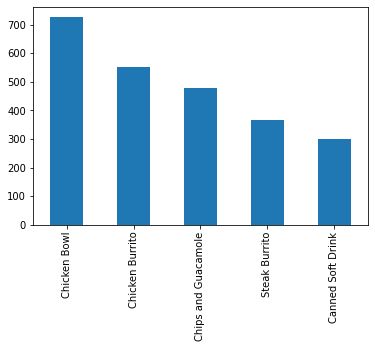

In [24]:
top5 = chipo.item_name.value_counts()[0:5]
top5.plot(kind='bar')

<Axes: xlabel='item_name'>

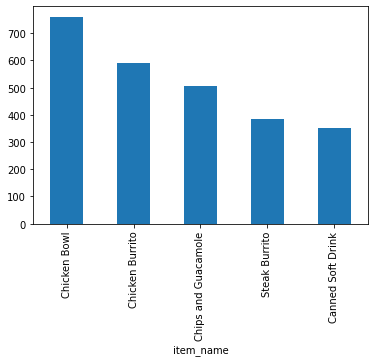

In [25]:
chipo_sorted = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)
chipo_sorted
chipo_sorted[0:5].plot(kind='bar')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0, 0.5, 'items ordered')

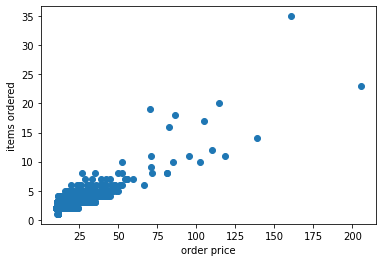

In [27]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]

order = chipo.groupby('order_id').sum()

plt.scatter(x = order.item_price, y = order.quantity)

plt.xlabel('order price')
plt.ylabel('items ordered')

### Step 7. BONUS: Create a question and a graph to answer your own question.

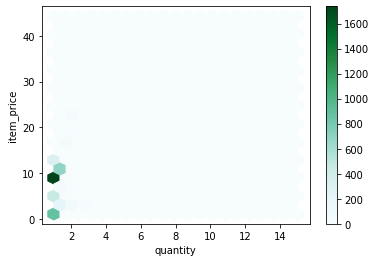

In [36]:
# quantity와 item_price의 육각 그래프 그리기 + 육각형의 사이즈는 20으로 하기
a, ax = plt.subplots()
ax = chipo.plot.hexbin(x='quantity', y='item_price', gridsize=20, ax=ax)